In [1]:
import tensorflow as tf

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [4]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [6]:
CLASS_NAMES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(CLASS_NAMES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
import random
from basicCNN import *

IMG_SIZE = 50
training_data , testing_data,  distribution = create_training_data(data_dir, IMG_SIZE, CLASS_NAMES)
random.shuffle(training_data)


In [8]:
print(len(training_data))
i = 0
for elem in distribution:
    print('Proportion of ' + str(CLASS_NAMES[i]))
    print(elem / image_count)
    i+=1

2749
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


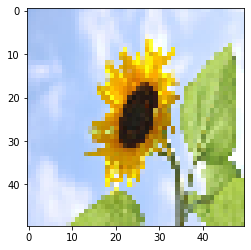

is represented like this to our code 
 
[[[236 184 154]
  [239 187 157]
  [237 189 162]
  ...
  [254 234 224]
  [254 237 230]
  [255 243 239]]

 [[238 186 156]
  [239 189 161]
  [240 191 165]
  ...
  [255 229 216]
  [253 231 216]
  [254 232 220]]

 [[238 188 160]
  [240 190 162]
  [241 192 166]
  ...
  [255 230 215]
  [255 230 216]
  [255 230 216]]

 ...

 [[253 216 200]
  [255 222 210]
  [255 226 212]
  ...
  [ 77 193 162]
  [ 95 202 175]
  [ 92 204 170]]

 [[255 217 200]
  [255 222 207]
  [254 225 211]
  ...
  [ 70 189 156]
  [ 79 199 168]
  [106 206 181]]

 [[254 217 202]
  [253 220 205]
  [255 223 210]
  ...
  [ 77 194 163]
  [ 90 199 171]
  [ 72 179 151]]]


In [33]:
X , y = restructure_data(training_data)
print('This image')
fix_colors = cv2.cvtColor(training_data[0][0], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()
print('is represented like this to our code \n ')
print(training_data[0][0])
#print(testing_data[0][0])


In [10]:
X = X/255.0

model = build_model(X,y,len(CLASS_NAMES))

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1924 samples, validate on 825 samples
Epoch 1/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 1.5036 - acc: 0.3602 - val_loss: 1.2455 - val_acc: 0.4885
Epoch 2/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 1.1506 - acc: 0.5187 - val_loss: 1.0612 - val_acc: 0.5636
Epoch 3/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 0.9949 - acc: 0.6055 - val_loss: 1.0239 - val_acc: 0.5891


In [11]:
X_test, y_test = restructure_data(training_data)
predictions = model.predict(X_test)

The model predicted that this image is a sunflowers


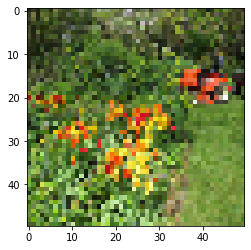

In [36]:
import random
check = random.randint(0,len(X_test)-1)
print('The model predicted that this image is a ' + CLASS_NAMES[np.argmax(predictions[check])])
fix_colors = cv2.cvtColor(X_test[check], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()